# Seaborn: Visualization Library

Seaborn is a Python data visualization library built on top of Matplotlib, designed to simplify the creation of complex plots and statistical visualizations.
Since it relies on Matplotlib under the hood, Seaborn plots are influenced by Matplotlib’s global settings and configurations.

- **Scatter Plot**: displays relationship between two continous features
- **Distribution Plot**: displays a single feature and visualizes statistical properties (mean, std, ...)
- **Categorical Plot**: displays statiscal properties by categorical groups.
  - may create individual distribution per category
- **Comparison Plot**: displays the differences and similarities between two or more distributions

Main features and advantages are:
- Uses plain feature names than complex data frame operations
- Supports various pre-defiend plot styles

## 1. Scatter Plot

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set pre-defined plot styles: https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles
sns.set_theme(style="darkgrid")

In [9]:
df = pd.read_csv("data/seaborn/dm_office_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


<Axes: xlabel='salary', ylabel='sales'>

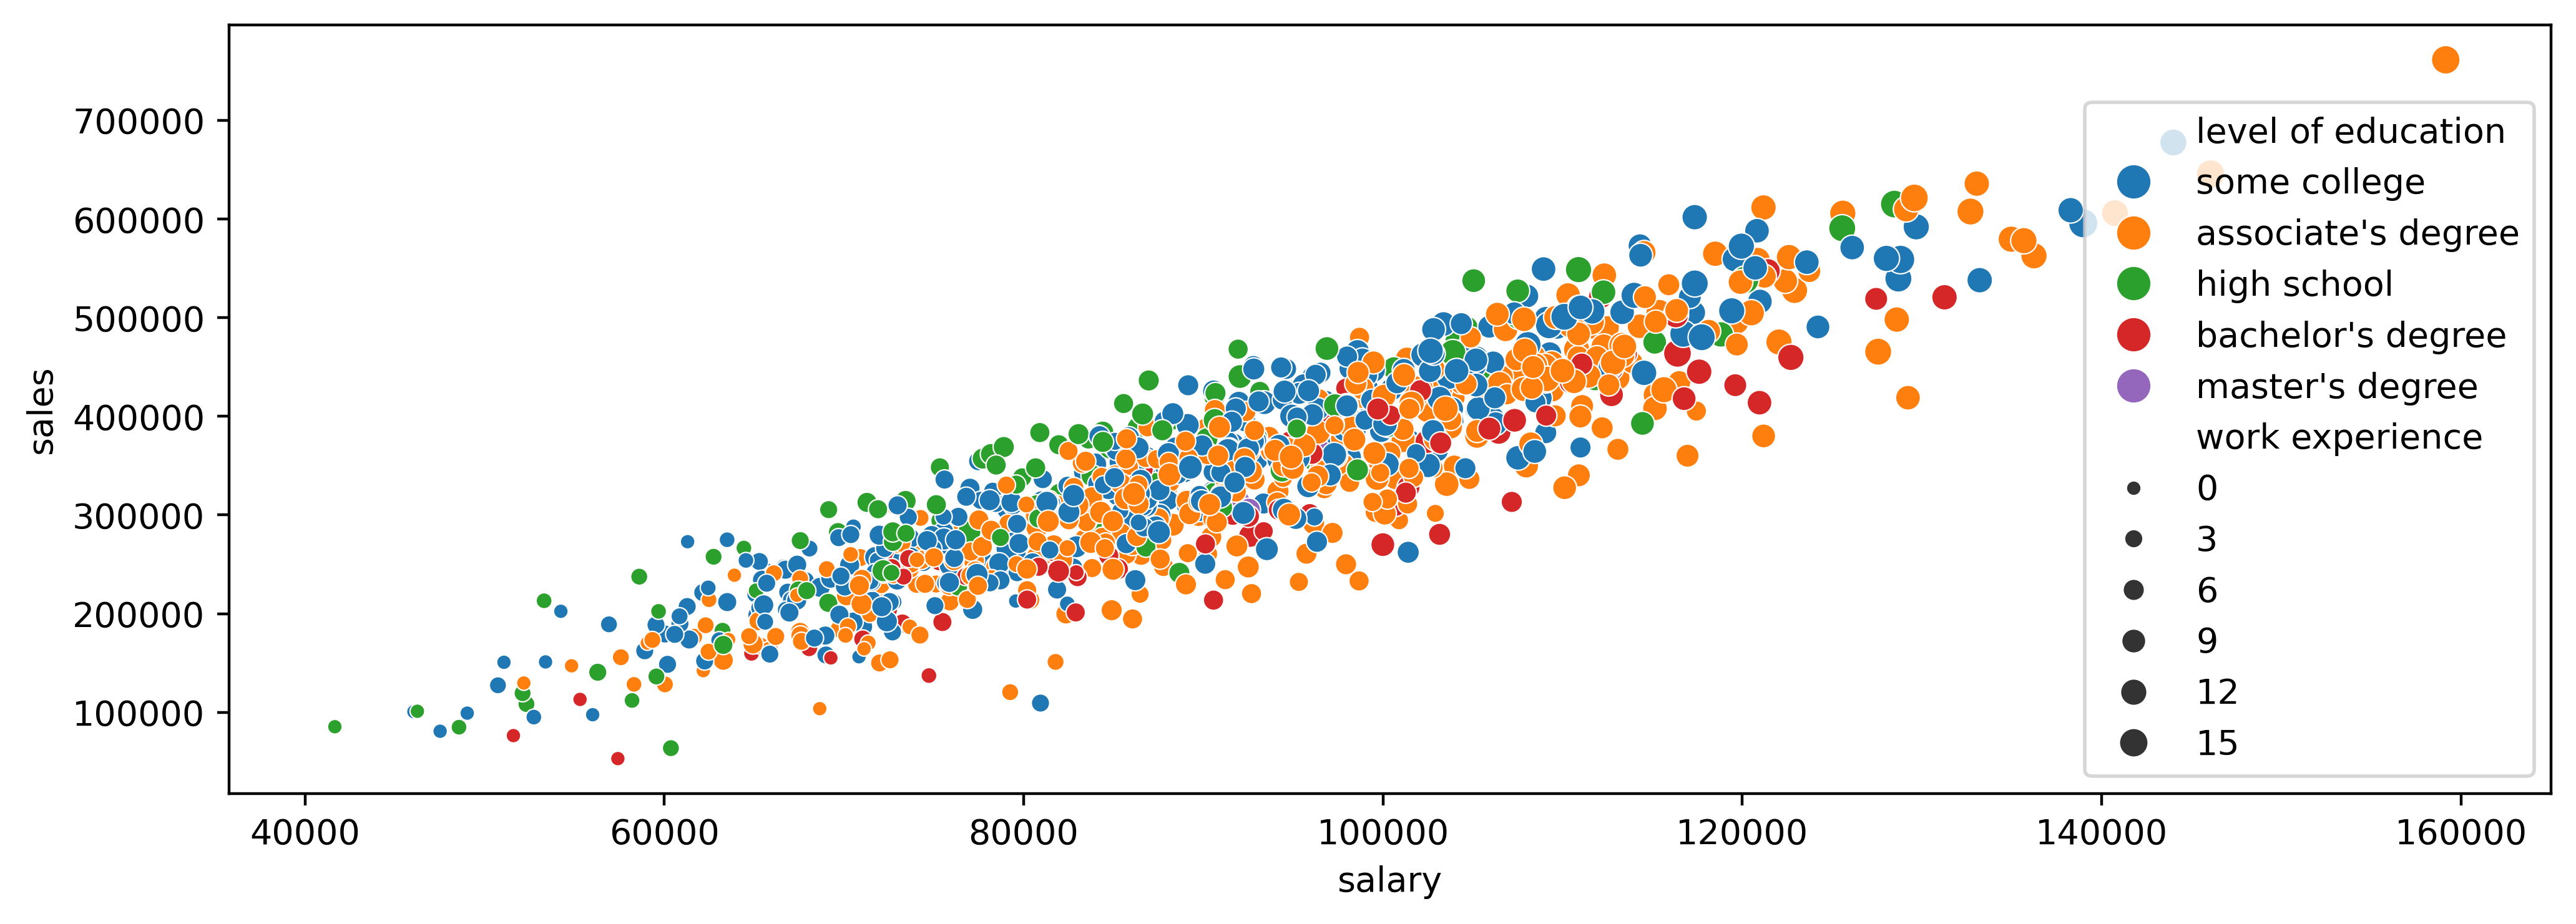

In [ ]:
# 1. Scatter Plot

plt.figure(figsize=(12,4), dpi=400)
sns.scatterplot(
    x='salary',                # a column for x axis
    y='sales',                 # a column for y axis
    hue='level of education',  # a column to color each point
    size='work experience',    # a column to adjust size of each point 
    data=df
)

## 2. Distribution Plot

### 2.1. Kernel Density Estimation

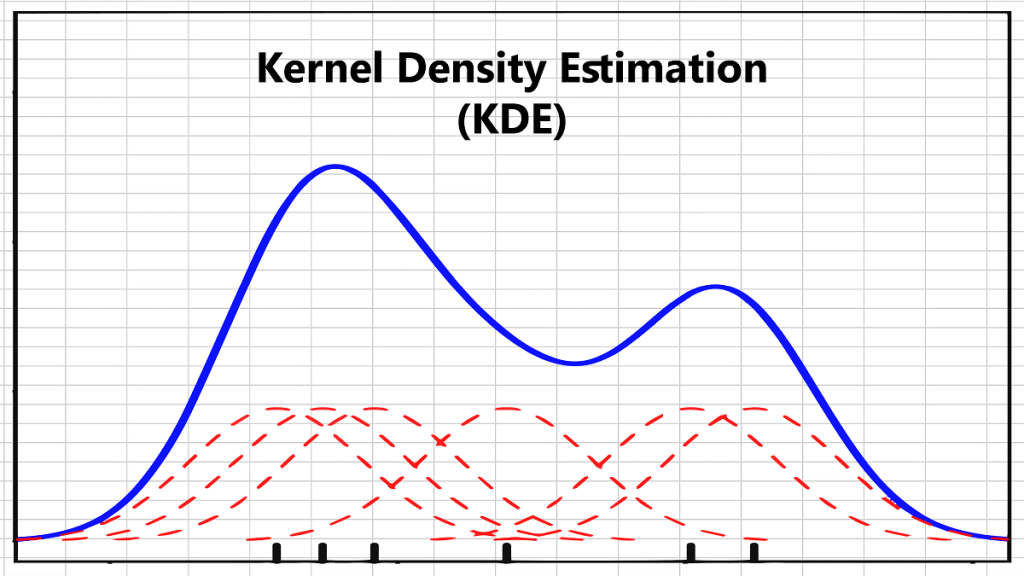  

Data distribution is sometimes too irregular and does not resemble any of the usual PDFs(Normal, Poisson, ...). KDE estimates continuos PDF from discrete sample data of a random variable.

1. Create a Rug plot from the data
2. Pick a distribution (Poisson, Normal, ...) -> Kernel
3. Draw the kernel to all the data points
4. Adds up all kernels

Bandwidth(`h`) adjusts the smoothness of the estimated density function as:  
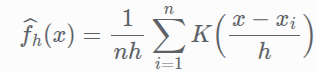  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
office_sales = pd.read_csv("data/seaborn/dm_office_sales.csv")
office_sales.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


<Axes: xlabel='salary'>

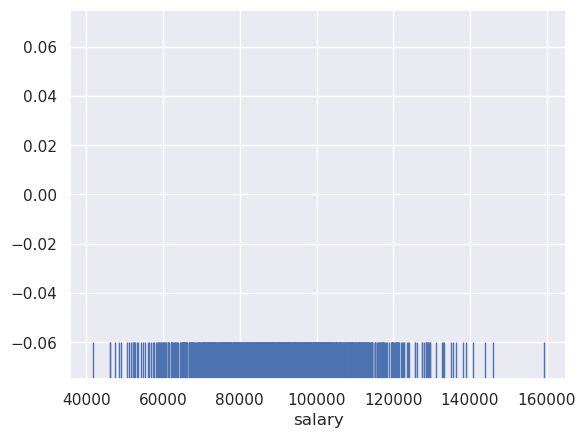

In [ ]:
# Distribution Plot 1: Rug plot
sns.rugplot(x='salary', height=0.1, data=office_sales)

<Axes: xlabel='salary', ylabel='Count'>

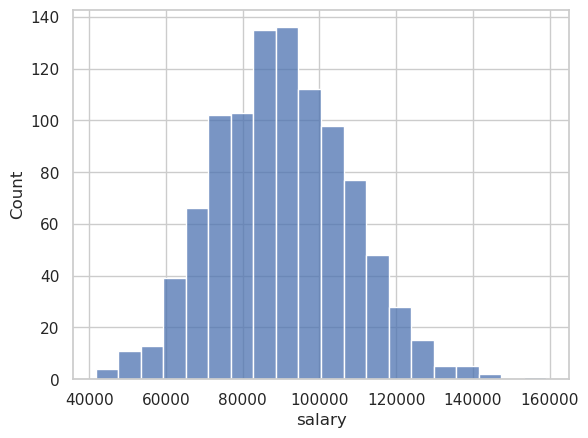

In [ ]:
# Distribution Plot 2: Histogram
sns.set_theme(style="whitegrid")
sns.histplot(x='salary', bins=20, data=office_sales)

<Axes: xlabel='salary', ylabel='Density'>

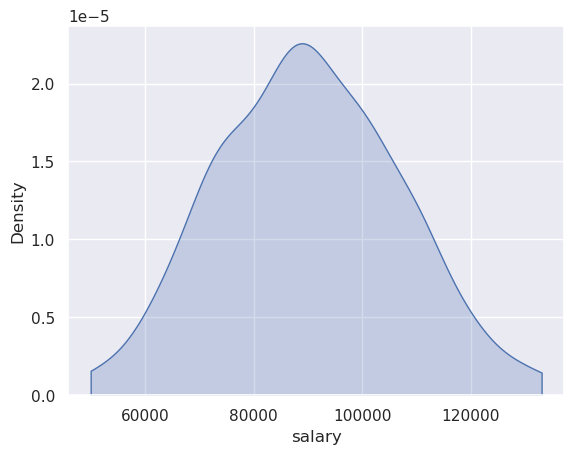

In [33]:
# 3. KDE Plot
sns.kdeplot(data=office_sales, x='salary', clip=[50000, 133000], bw_adjust=1, fill=True)

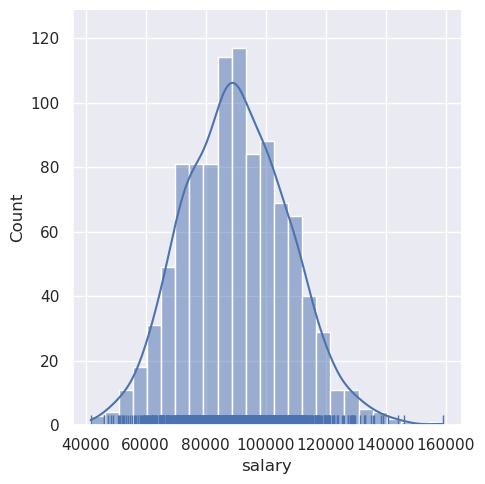

In [ ]:
# Highter level plot for distribution plots: can mix all distribution plots
sns.displot(data=office_sales, x='salary', kde=True, rug=True)

## 3. Categorical Plot
Categorical plots visualizes statistical metrics per category.
  - `countplot`: counts data per category
  - `barplot`: provides statistical metric per category (more generic plot)

It's also possible to explore distributions per category
  - `Boxplot`: displays distribution of contious variable through the use of quartiles
  - `Violinplot`: displays the probability density across the data using a mirrored KDE
  - `Swarmplot`: displays the raw data points per category

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

office_sales = pd.read_csv("data/seaborn/dm_office_sales.csv")
student_performance = pd.read_csv("data/seaborn/StudentsPerformance.csv")

In [4]:
office_sales.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


<Axes: xlabel='division', ylabel='count'>

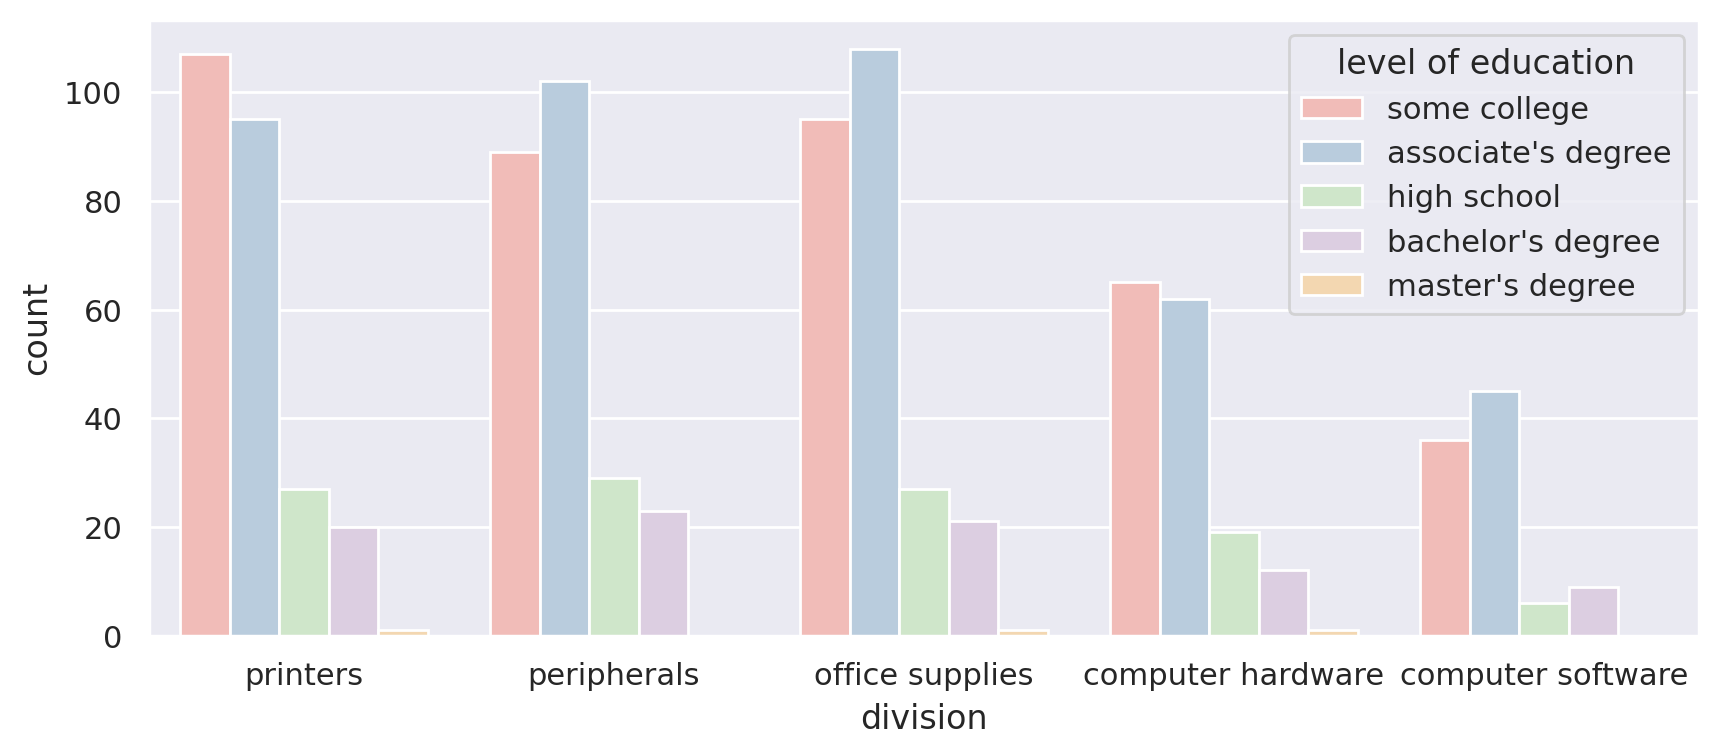

In [38]:
# 1. countplot: Counts data per category
plt.figure(figsize=(10, 4), dpi=200)
sns.countplot(data=df, x='division', hue='level of education', palette="Pastel1")

<Axes: xlabel='level of education', ylabel='salary'>

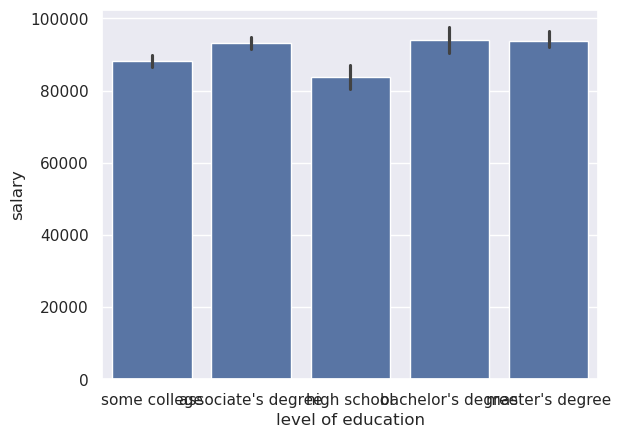

In [ ]:
# 2. bar plot: can choose other metrics other than count as y-axis
sns.barplot(data=df, x='level of education', y='salary', estimator=np.mean)

In [5]:
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='parental level of education', ylabel='math score'>

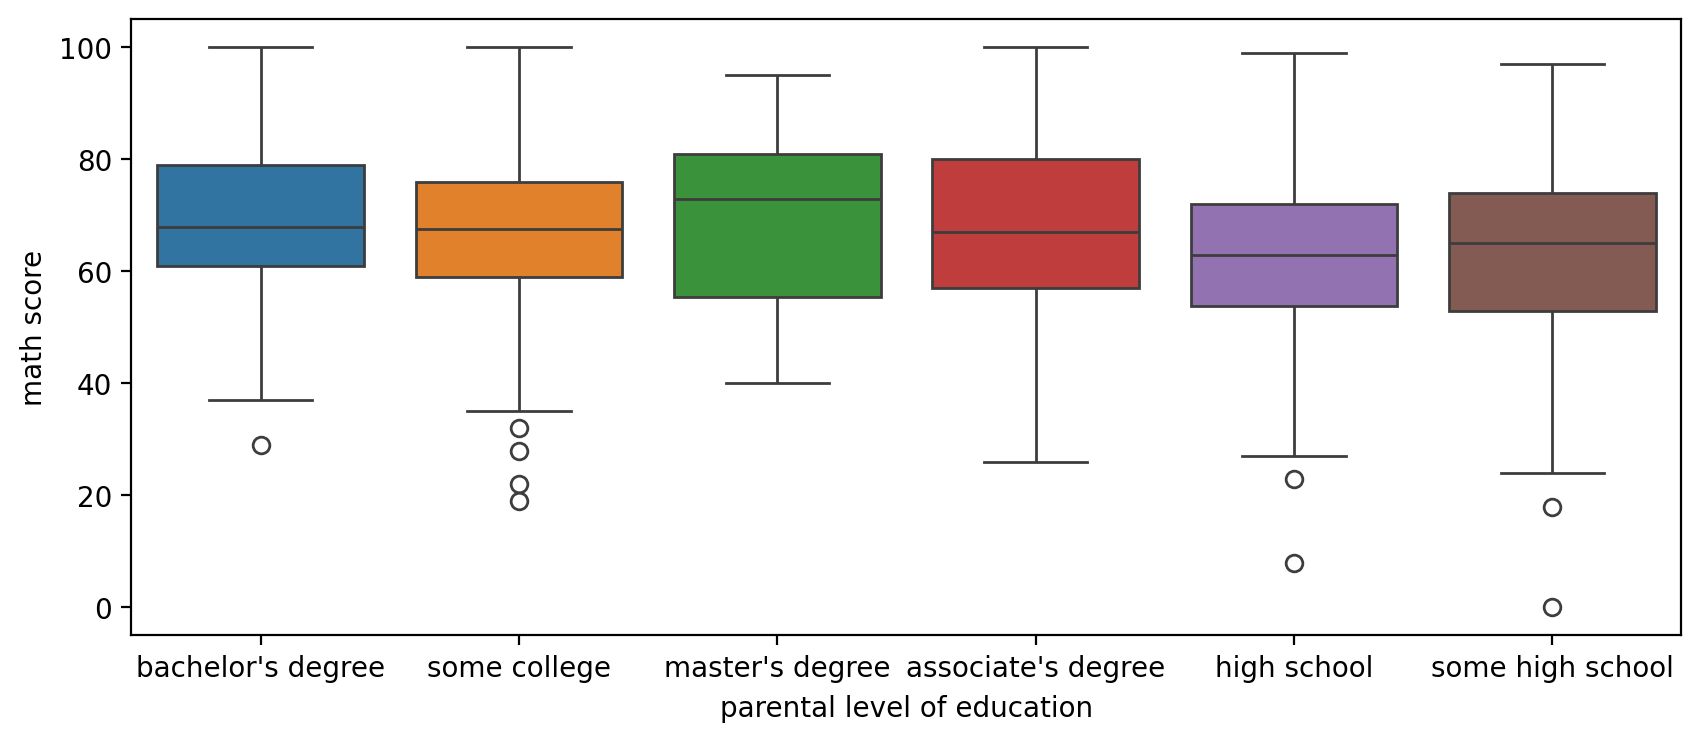

In [20]:
# 3. box plot per category
# the black line at the center is the median
# the box represents IQR(Q1 ~ Q3)
plt.figure(figsize=(10, 4), dpi=200)
sns.boxplot(data=student_performance, y='math score', x='parental level of education', hue='parental level of education')

<Axes: xlabel='math score', ylabel='parental level of education'>

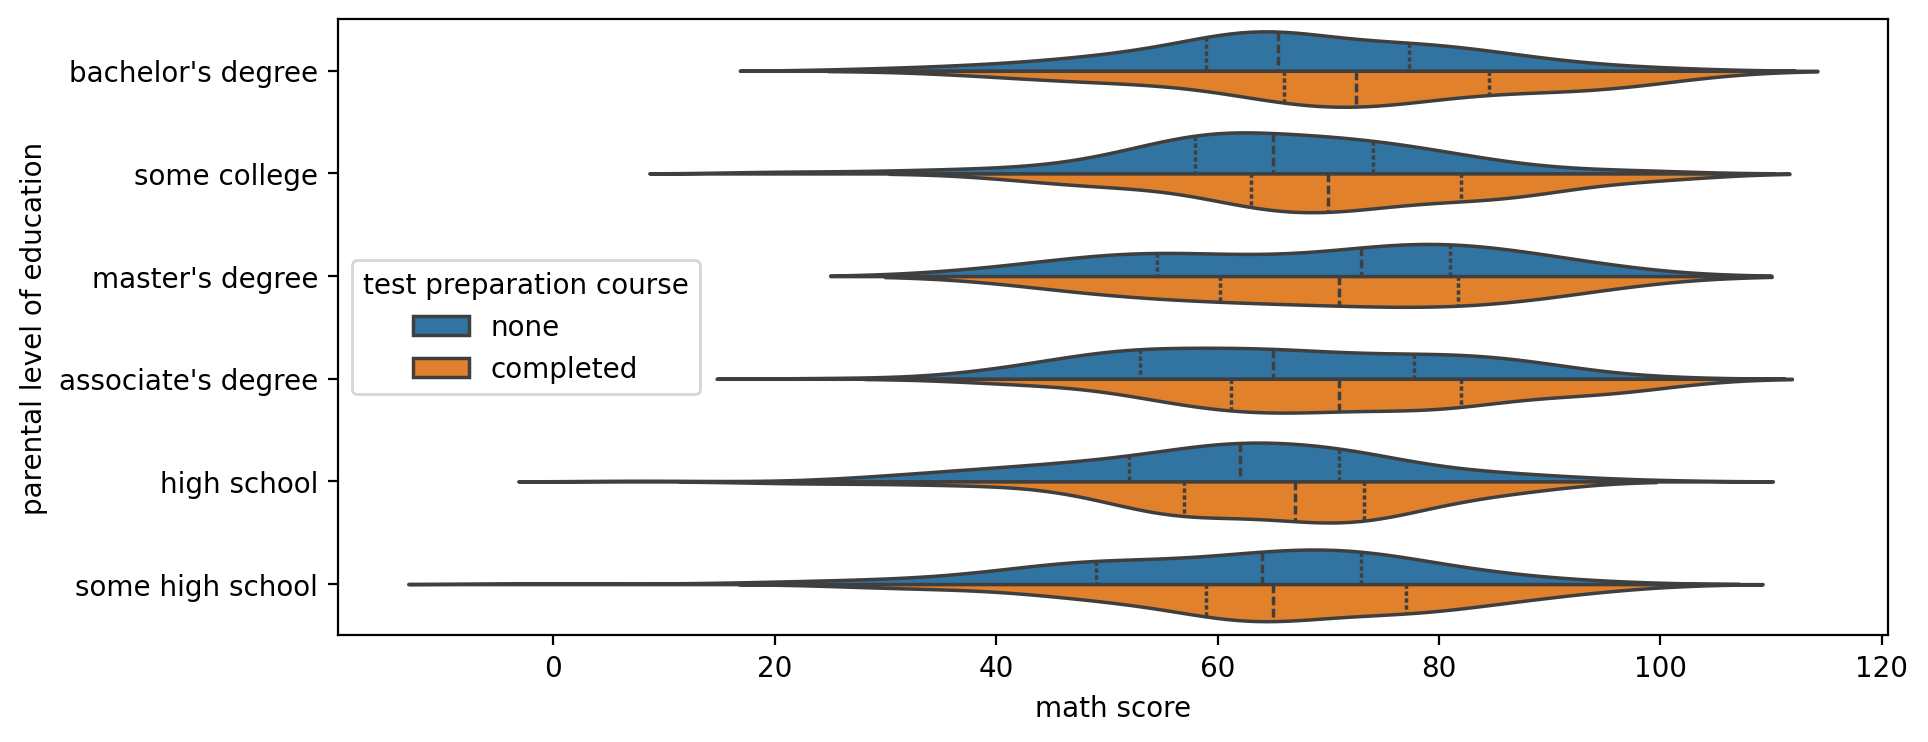

In [26]:
# violin plot: instead of mirrored, set split=True for half-half display
plt.figure(figsize=(10, 4), dpi=200)
sns.violinplot(
    data=student_performance, 
    x='math score', y='parental level of education', 
    hue='test preparation course',
    inner='quartile',
    split=True,
)

<Axes: xlabel='math score', ylabel='gender'>

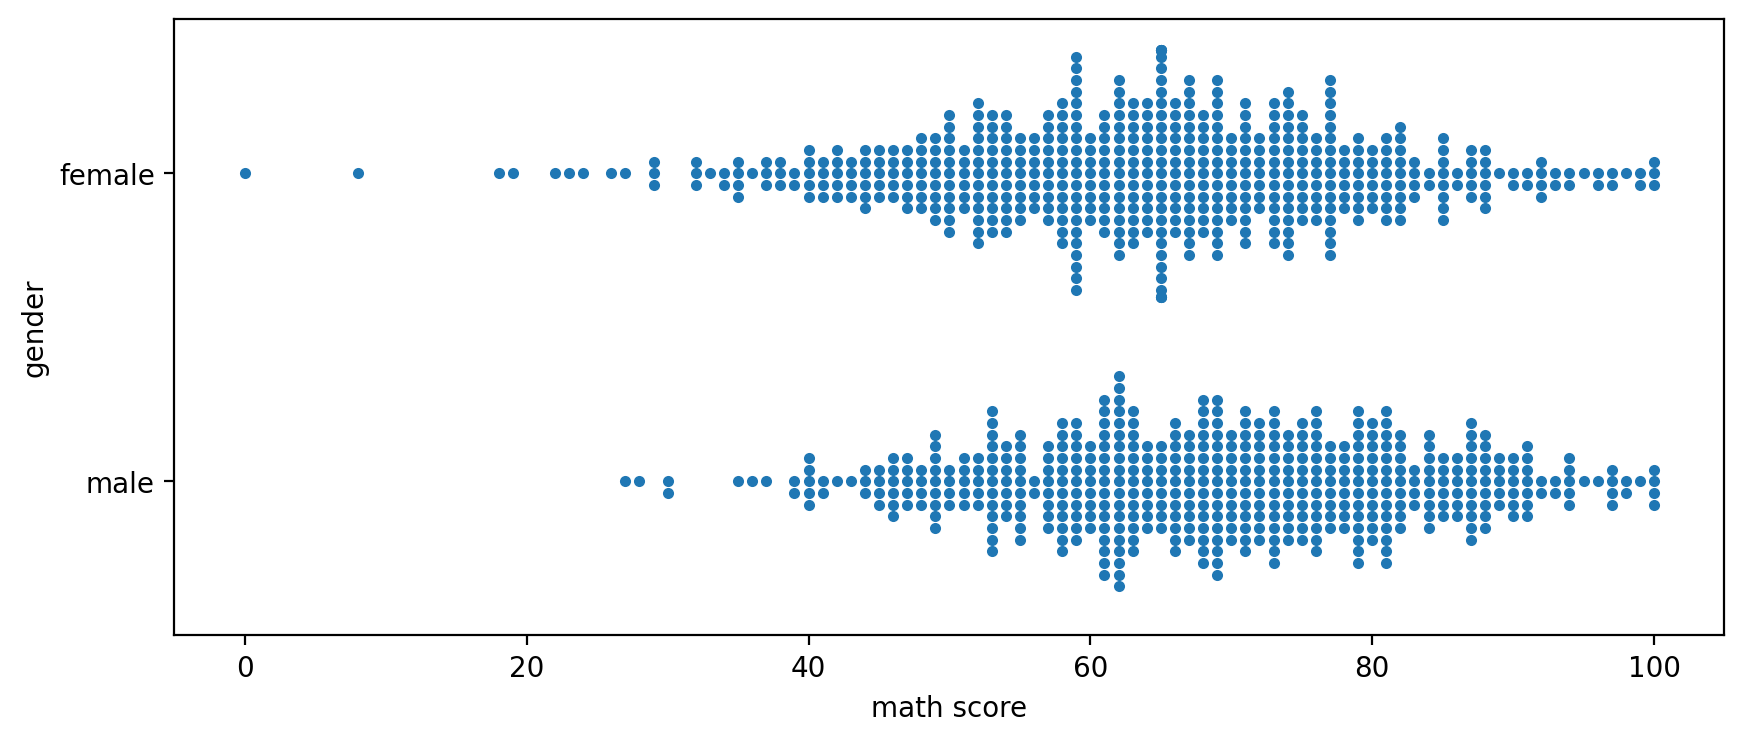

In [ ]:
# swarm plot: discrete interpretation of KDE(violin plot)
plt.figure(figsize=(10, 4), dpi=200)
sns.swarmplot(data=student_performance, x='math score', y='gender', size=4)

## 4. Comparison Plot
Comparison plots show the differences and similarities between two or more distributions, simply put, 2-dimensional versions of the plots.
- `jointplot`: Draws a plot of two variables (x and y axis each), mapping them as a inner plot (bivariant) and as outer plots (univarite, axis-wise) 
  - ex) Histogram + Scatter
  - ex) Scatter + KDE
- `pairplot`: Creates a histogram and a scatterplot between all possible combinations of numerical columns
  - Histograms for diagonal subplots (univariate)
  - Scatters for non-diagonal subplots (bivariate)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

office_sales = pd.read_csv("data/seaborn/dm_office_sales.csv")
student_performance = pd.read_csv("data/seaborn/StudentsPerformance.csv")

student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


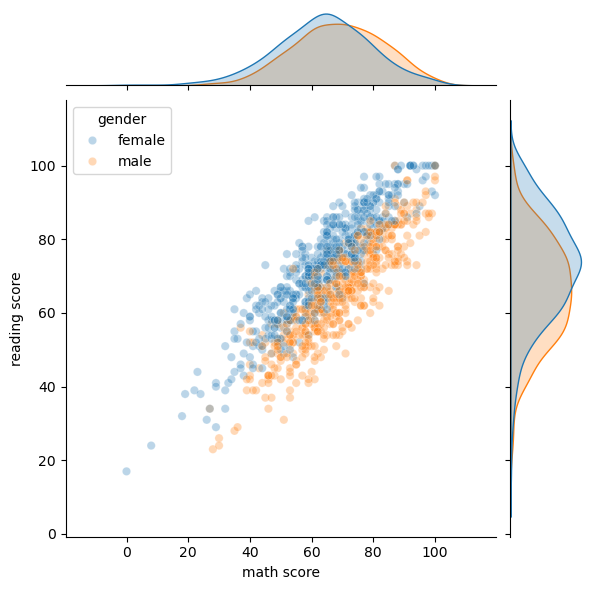

In [42]:
# 1. Joint Plot
# See if there's relationship between different scores
# Adjust 'kind' parameter to choose a graph type

sns.jointplot(
    data = student_performance, 
    x='math score', y='reading score',
    hue='gender',
    alpha=0.3
)


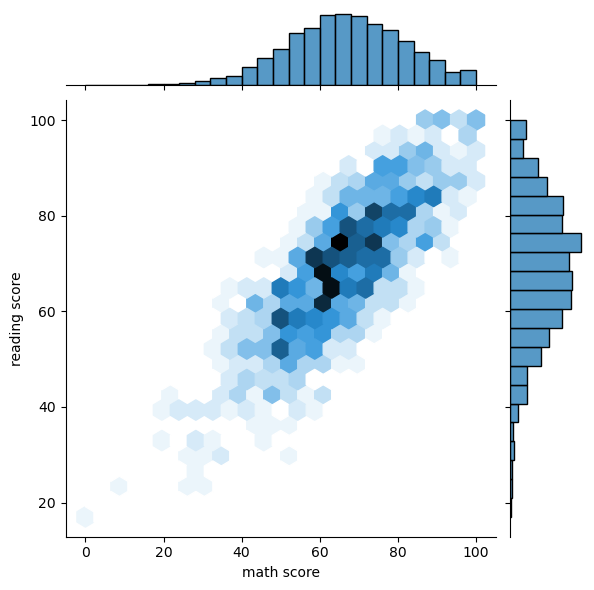

In [39]:
# use Hex plot to intuitively see how many data points are stacked in each area
sns.jointplot(
    data=student_performance,
    x='math score', y='reading score',
    kind='hex'
)

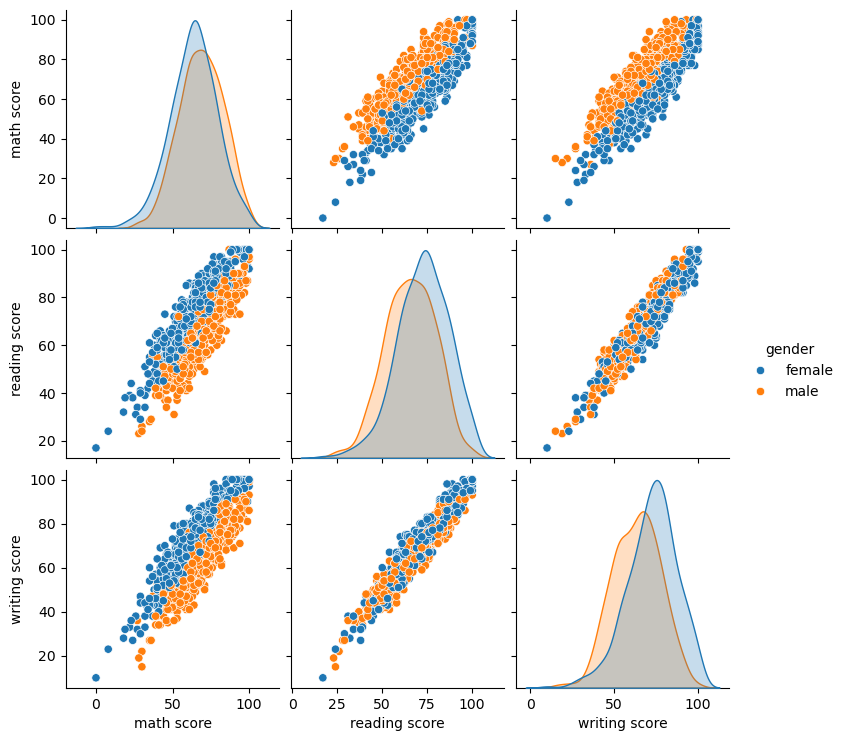

In [ ]:
# 2. Pair plot
# Make sure to filter out to less than 5 numerical features
sns.pairplot(data=student_performance, hue='gender')

## 5. Matrix Plot

Matrix plots display relationships between multiple variables in a matrix form.
- `Heatmap`: displays the distribution of cell values with color mappings
  - color mapping makes sense when all variables are in **the same unit**
- `Clustermap`: first conduct hierarchical clustering to reorganizing into groups

In [22]:
# 1. Heatmap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_table = pd.read_csv("data/seaborn/country_table.csv")
country_table = country_table.set_index("Countries")
country_table.head()

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11


<Axes: ylabel='Countries'>

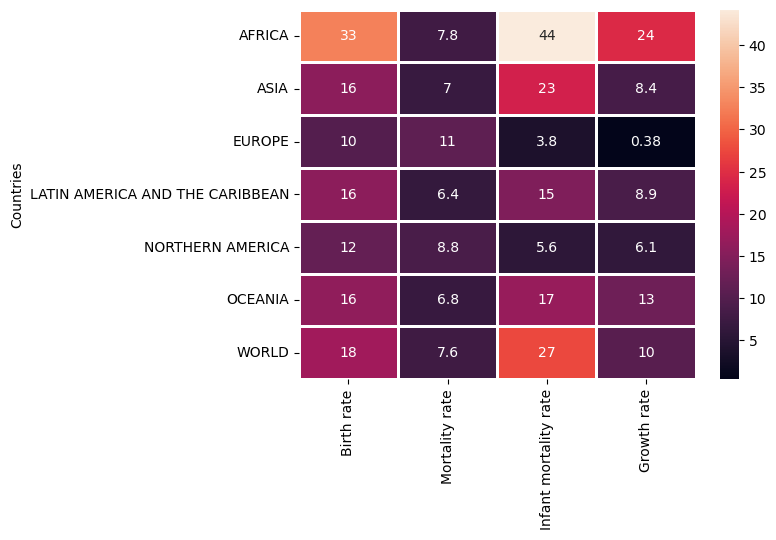

In [ ]:
# 1. Heatmap
#  - remove the 'life expectancy' column which has way larger values than others
#  - linewidths: inter-spacing between cells
#  - annot: displays text values on each cell
sns.heatmap(
    data=country_table.drop('Life expectancy', axis=1),
    linewidths=1,
    annot=True
)

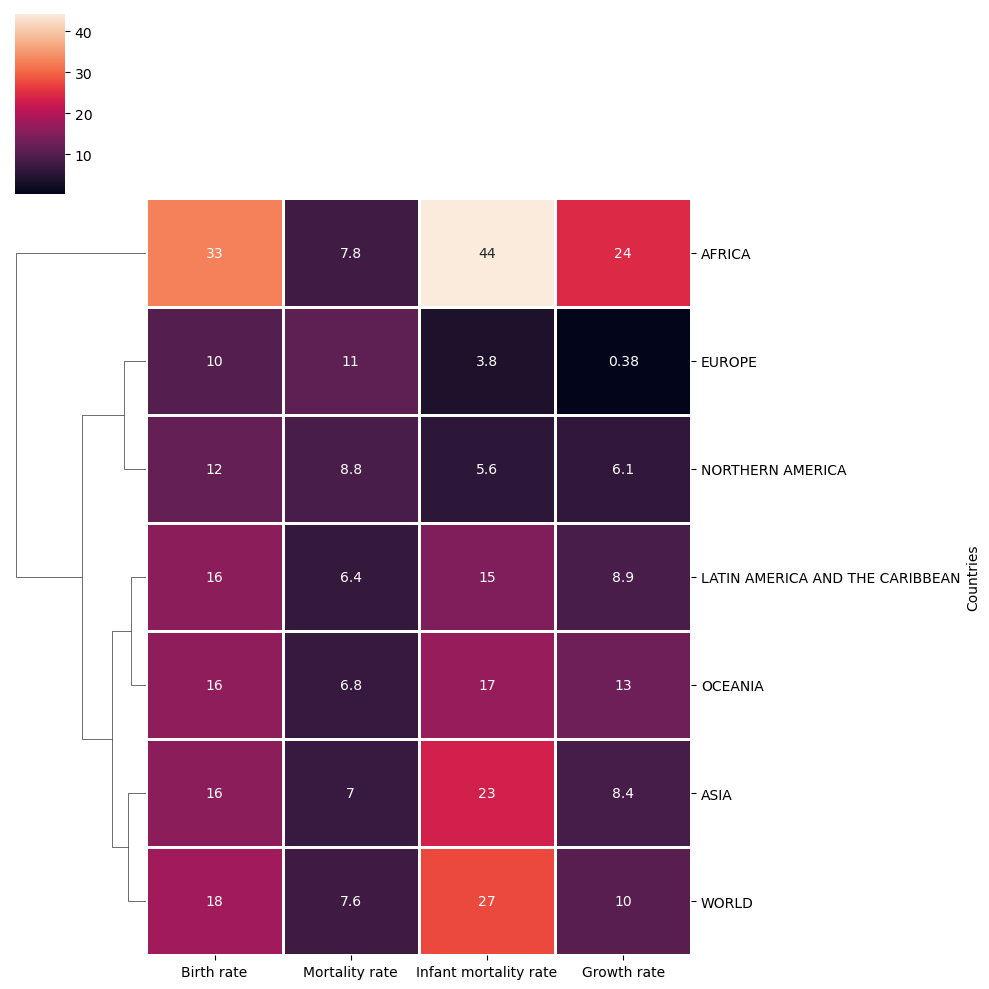

In [35]:
# 2. Clustermap
#  - groups correlated items together
#    - ex) EUROPE and N.America are similar to each other than others
#  - adjust `col_cluster`, `row_cluster` to turn clustering on and off
sns.clustermap(
    data= country_table.drop('Life expectancy', axis=1),
    linewidths= 1,
    annot=True,
    col_cluster=False,
    row_cluster=True
)